# EnKF Experiments - GCS

## Imports

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import shapiro, kruskal
import seaborn as sns
import sys

In [2]:
# Local
from experiment_utils import Modeller, Processor, Visualiser

sys.path.append('../../stationsim/')
from ensemble_kalman_filter import EnsembleKalmanFilter
from stationsim_gcs_model import Model

In [3]:
%matplotlib inline
np.random.seed(42)

## Functions

In [4]:
def tidy_dataframe(df, independent_col: str, dependent_cols: list):
    output = list()
    
    for i, row in df.iterrows():
        for col in dependent_cols:
            d = {independent_col: row[independent_col],
                 'variable':  col,
                 'value': row[col]}
            output.append(d)
    
    output = pd.DataFrame(output)
    return output

## Data paths

In [5]:
data_dir = './results/data/'
gcs_model_baseline_dir = data_dir + 'gcs_model_baseline/'
gcs_model_1_dir = data_dir + 'gcs_model_exp_1/'

In [6]:
fig_dir = './results/figures/gcs_model/'

In [7]:
model_dir = './results/models/'

## Experiment 0 - Baseline

### Run experiment

#### Benchmark

../../stationsim/ensemble_kalman_filter.py:135: RuntimeWarning: EnKF received unexpected vanilla_ensemble_size attribute.
  warns.warn(w, RuntimeWarning)


(40, 20)
Running Ensemble Kalman Filter...
max_iterations:	None
ensemble_size:	None
assimilation_period:	None
filter_type:	EnsembleKalmanFilterType.STATE


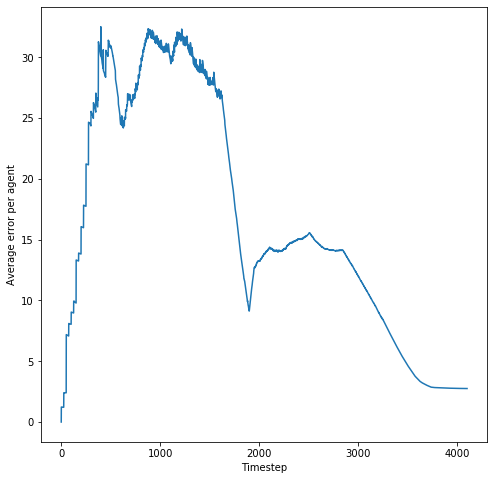

In [8]:
Modeller.run_enkf_benchmark()

#### Collisions

  0%|          | 0/20 [00:00<?, ?it/s]

Running for 5 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 10 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 15 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 20 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 25 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 30 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 35 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 40 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 45 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 50 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 55 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 60 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 65 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 70 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 75 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 80 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 85 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 90 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 95 agents


  0%|          | 0/20 [00:00<?, ?it/s]

Running for 100 agents


100%|██████████| 20/20 [10:59<00:00, 32.96s/it]


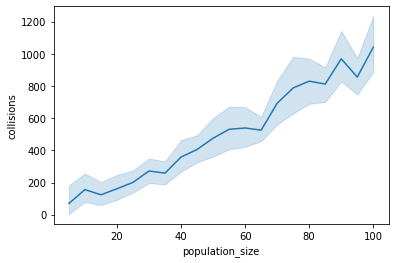

In [9]:
Modeller.run_model_collisions()

### Analysis

#### Benchmark

In [10]:
with open(model_dir + 'baseline.pkl', 'rb') as f:
    baseline_filter = pickle.load(f)

baseline_results = pd.DataFrame(baseline_filter.forecast_error)
baseline_results.head()

,time,forecast
0,0,0.000000
1,1,1.233940
2,2,1.233135
3,3,1.232331
4,4,1.231526


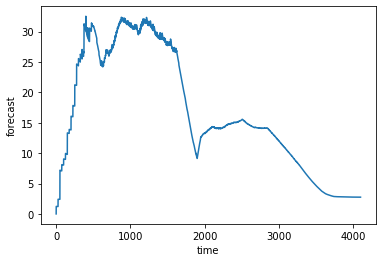

In [11]:
plt.figure()
sns.lineplot(x='time', y='forecast', data=baseline_results)
plt.savefig(fig_dir + 'baseline_errors_10.pdf')
plt.show()

#### Collisions

In [13]:
collisions = pd.read_csv(data_dir + 'model_collisions.csv')
collisions.head()

,Unnamed: 0,collisions,population_size
0,0,124,5
1,1,9,5
2,2,0,5
3,3,0,5
4,4,0,5


In [14]:
if 'Unnamed: 0' in collisions.columns:
    collisions = collisions.drop('Unnamed: 0', axis=1)

In [15]:
collisions.head()

,collisions,population_size
0,124,5
1,9,5
2,0,5
3,0,5
4,0,5


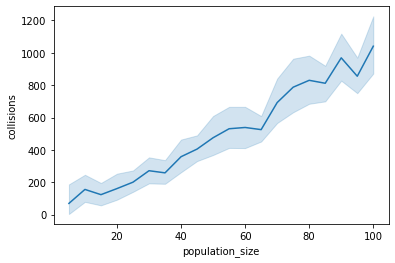

In [16]:
plt.figure()
sns.lineplot(x='population_size', y='collisions', data=collisions)
plt.savefig(fig_dir + 'baseline_collisions.pdf')
plt.show()

## Experiment 1 - Setting Up EnKF

In [9]:
Modeller.run_experiment_1(pop_size=20)

  0%|          | 0/10 [00:00<?, ?it/s]

(40, 20)
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 10%|█         | 1/10 [01:24<12:37, 84.17s/it]

(40, 20)
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 20%|██        | 2/10 [03:00<12:12, 91.52s/it]

(40, 20)
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 30%|███       | 3/10 [04:42<11:13, 96.21s/it]

(40, 20)
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 40%|████      | 4/10 [06:54<11:02, 110.44s/it]

(40, 20)
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 50%|█████     | 5/10 [08:49<09:19, 111.81s/it]

(40, 20)
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 60%|██████    | 6/10 [10:23<07:04, 106.03s/it]

(40, 20)
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 70%|███████   | 7/10 [12:19<05:27, 109.13s/it]

(40, 20)
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 80%|████████  | 8/10 [14:24<03:48, 114.22s/it]

(40, 20)
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 90%|█████████ | 9/10 [16:09<01:51, 111.25s/it]

(40, 20)
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


100%|██████████| 10/10 [17:54<00:00, 107.42s/it]


In [9]:
Processor.process_experiment_1()

#### Read data

In [10]:
results = pd.read_csv(gcs_model_1_dir + 'p20/metrics.csv')
results.head()

,time,forecast,obs,analysis,vanilla
0,0,0.000000,1.197300,0.000000,0.000000
1,20,2.191419,1.385210,0.030641,1.192665
2,40,5.140451,1.062791,0.088992,4.839001
3,60,4.624826,1.010487,0.066621,9.973777
4,80,3.377638,1.143848,0.070623,11.717905


In [11]:
results.shape

(2462, 5)

#### Tidy up data

In [12]:
error_types = ['forecast', 'obs', 'analysis', 'baseline']

In [13]:
tidy_df = tidy_dataframe(results, 'time', error_types)
tidy_df.head()

,time,variable,value
0,0.0,forecast,0.000000
1,0.0,obs,1.197300
2,0.0,analysis,0.000000
3,0.0,vanilla,0.000000
4,20.0,forecast,2.191419


#### Plot results

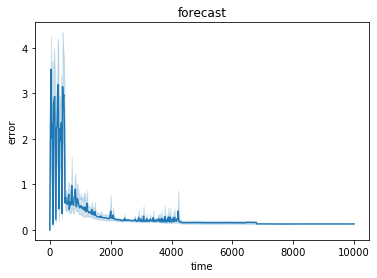

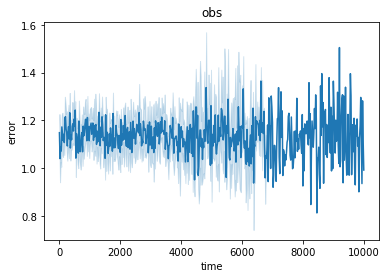

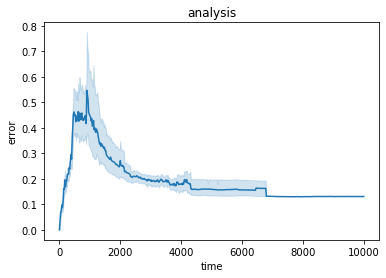

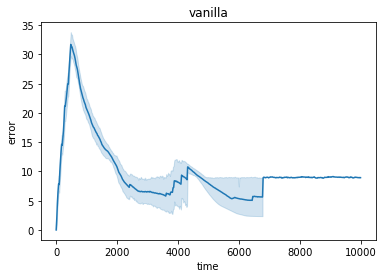

In [14]:
for error_type in error_types:
    df = tidy_df.loc[tidy_df['variable']==error_type, :]
    plt.figure()
    sns.lineplot(x='time', y='value', data=df)
    plt.ylabel('error')
    plt.title(error_type)
    plt.savefig(fig_dir + f'exp_1_{error_type}.pdf')
    plt.show()

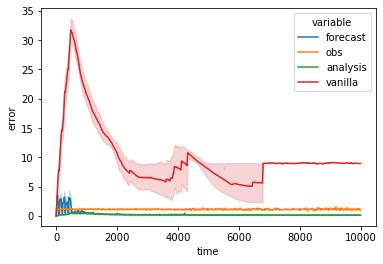

In [15]:
plt.figure()
sns.lineplot(x='time', y='value', hue='variable', data=tidy_df)
plt.ylabel('error')
plt.savefig(fig_dir + 'exp_1.pdf')
plt.show()

In [16]:
reduced_tidy_df = tidy_df.loc[(tidy_df['variable']=='baseline') | (tidy_df['variable']=='analysis'), :]

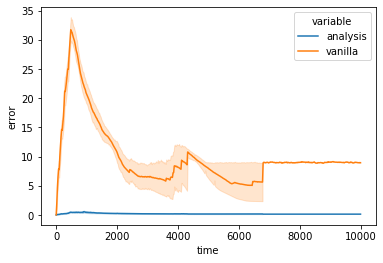

In [17]:
plt.figure()
sns.lineplot(x='time', y='value', hue='variable', data=reduced_tidy_df)
plt.ylabel('error')
plt.savefig(fig_dir + 'exp_1_reduced.pdf')
plt.show()

## Experiment 2 - Impact of Filter Parameters

In [18]:
Modeller.run_repeat_combos(resume=False)

running for (2, 2, 2, 0.5)
Running iteration 1
Running Ensemble Kalman Filter...
max_iterations:	3600
ensemble_size:	2
assimilation_period:	2
filter_type:	EnsembleKalmanFilterType.STATE
Running iteration 2
Running Ensemble Kalman Filter...
max_iterations:	3600
ensemble_size:	2
assimilation_period:	2
filter_type:	EnsembleKalmanFilterType.STATE
Running iteration 3
Running Ensemble Kalman Filter...
max_iterations:	3600
ensemble_size:	2
assimilation_period:	2
filter_type:	EnsembleKalmanFilterType.STATE
Running iteration 4
Running Ensemble Kalman Filter...
max_iterations:	3600
ensemble_size:	2
assimilation_period:	2
filter_type:	EnsembleKalmanFilterType.STATE
Running iteration 5
Running Ensemble Kalman Filter...
max_iterations:	3600
ensemble_size:	2
assimilation_period:	2
filter_type:	EnsembleKalmanFilterType.STATE
Running iteration 6
Running Ensemble Kalman Filter...
max_iterations:	3600
ensemble_size:	2
assimilation_period:	2
filter_type:	EnsembleKalmanFilterType.STATE
Running iteration 7

KeyboardInterrupt: 